Проект посвящен крупнейшей в мире таксомоторной компании Uber inc. В этом проекте мы хотим спрогнозировать стоимость проезда для их будущих транзакционных случаев. Uber ежедневно обслуживает сотни тысяч клиентов. Теперь становится действительно важно правильно управлять их данными, чтобы придумывать новые бизнес-идеи для получения наилучших результатов. В конечном итоге становится действительно важно точно оценивать стоимость проезда.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [2]:
df = pd.read_csv("uber.csv");

### Описание данных

- key - уникальный идентификатор для каждой поездки
- fare_amount - стоимость каждой поездки в долларах США
- pickup_datetime - дата и время включения счетчика
- pickup_longitude - долгота, на которой был включен счетчик
- pickup_latitude - широта, на которой был включен счетчик
- dropoff_longitude - долгота, где счетчик был отключен
- dropoff_latitude - широта, где счетчик был отключен
- passenger_count - количество пассажиров в транспортном средстве (значение, введенное водителем)

Целевой признак:
- fare_amount

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


Предобработка данных

In [4]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [5]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.shape

(200000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df.sample(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
117436,24.9,2010-12-14 22:04:46 UTC,-73.980308,40.765236,-73.958965,40.676489,1
26930,3.5,2014-05-09 19:05:00 UTC,-73.978110,40.773390,-73.980630,40.769920,1


In [9]:
df.passenger_count.value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [10]:
df = df[~(df.passenger_count == 0) & ~(df.passenger_count == 208)]

In [11]:
df.shape

(199290, 7)

In [12]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
df = df[
    (df.pickup_latitude < 90) & (df.dropoff_latitude > -90) &
    (df.pickup_latitude > -90) & (df.dropoff_latitude < 90) &
    (df.pickup_longitude > -180) & (df.pickup_longitude < 180)&
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180)
]

In [14]:
df.shape

(199278, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_datetime    199278 non-null  object 
 2   pickup_longitude   199278 non-null  float64
 3   pickup_latitude    199278 non-null  float64
 4   dropoff_longitude  199278 non-null  float64
 5   dropoff_latitude   199278 non-null  float64
 6   passenger_count    199278 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [17]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [18]:
df.sample(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
164110,8.0,2013-01-13 20:43:00+00:00,-73.994395,40.750822,-73.978775,40.772455,1,2013,1,13,20
100426,3.0,2015-04-18 12:49:16+00:00,-73.975929,40.765430,-73.976120,40.765549,1,2015,4,18,12


In [19]:
df.drop(['pickup_datetime'], axis=1, inplace=True)

In [20]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199278 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199278 non-null  float64
 1   pickup_longitude   199278 non-null  float64
 2   pickup_latitude    199278 non-null  float64
 3   dropoff_longitude  199278 non-null  float64
 4   dropoff_latitude   199278 non-null  float64
 5   passenger_count    199278 non-null  int64  
 6   year               199278 non-null  int32  
 7   month              199278 non-null  int32  
 8   day                199278 non-null  int32  
 9   hour               199278 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 13.7 MB


In [22]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
dtype: int64

In [23]:
df.duplicated().sum()

3

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
# pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
from geopy.distance import geodesic
df['distance'] = [round(geodesic((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).km, 2) for i in df.index]


In [27]:
df.drop(['hour', 'month'], axis=1, inplace=True)


In [28]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,4.48
...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,28,0.11
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,14,1.88
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,29,12.87
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,20,3.54


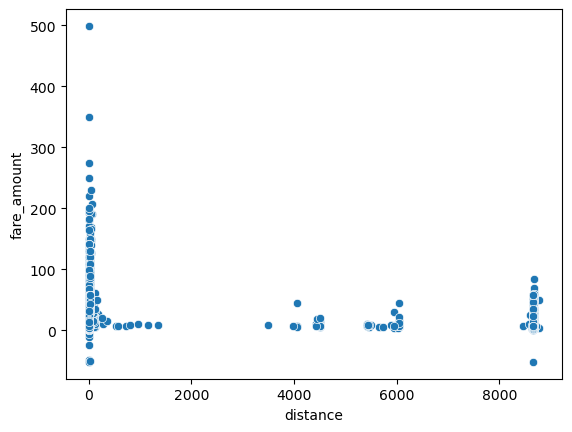

In [29]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.show()


In [30]:
df = df[(df.fare_amount < 250) & (df.fare_amount > 0)]
df = df[df.distance < 250]

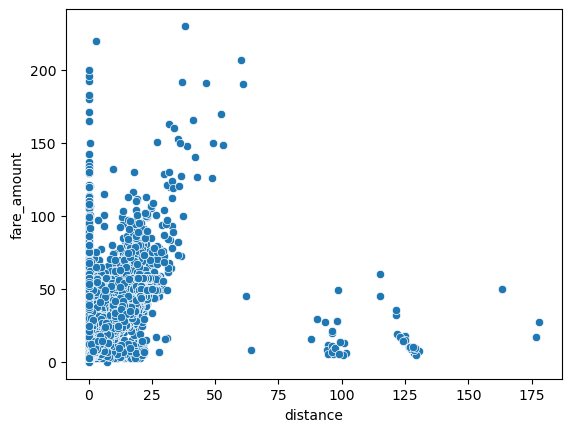

In [31]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.show()

In [32]:
df1 = df.copy()
features1 = ['fare_amount', 'distance']

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
display(df1.head())


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,7,1.68
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,17,2.45
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,24,5.04
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,26,1.66
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,28,4.48


In [33]:
df = df1.copy()


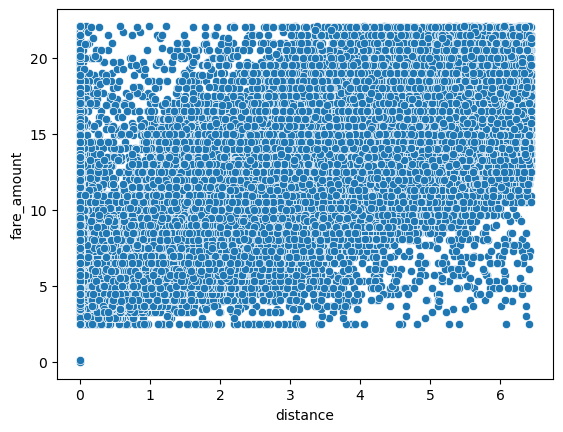

In [34]:
sns.scatterplot(data=df, x='distance', y='fare_amount')
plt.show()

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        173737 non-null  float64
 1   pickup_longitude   173737 non-null  float64
 2   pickup_latitude    173737 non-null  float64
 3   dropoff_longitude  173737 non-null  float64
 4   dropoff_latitude   173737 non-null  float64
 5   passenger_count    173737 non-null  int64  
 6   year               173737 non-null  int32  
 7   day                173737 non-null  int32  
 8   distance           173737 non-null  float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 10.6 MB


In [36]:
#df_dummy = pd.get_dummies(df[['monthly_quarter', 'hourly_segment']], drop_first= True)

In [37]:
#df = pd.concat([df, df_dummy], axis=1)

In [38]:
#df.drop(['monthly_quarter', 'hourly_segment'], axis=1, inplace=True)


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173737 entries, 0 to 173736
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        173737 non-null  float64
 1   pickup_longitude   173737 non-null  float64
 2   pickup_latitude    173737 non-null  float64
 3   dropoff_longitude  173737 non-null  float64
 4   dropoff_latitude   173737 non-null  float64
 5   passenger_count    173737 non-null  int64  
 6   year               173737 non-null  int32  
 7   day                173737 non-null  int32  
 8   distance           173737 non-null  float64
dtypes: float64(6), int32(2), int64(1)
memory usage: 10.6 MB


In [40]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.602122377672735
MSE: 5.161217021389488
RMSE: 2.2718312044228743
R2 Square 0.6262381519681841
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.5979849216263187
MSE: 5.082643931408264
RMSE: 2.2544719850573136
R2 Square 0.6334431548642441
__________________________________


In [43]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.6164676650105418
MSE: 5.214209042538584
RMSE: 2.283464263468685
R2 Square 0.6224006082893301
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.611799947630313
MSE: 5.137149670500353
RMSE: 2.2665281093558827
R2 Square 0.6295122377996184
__________________________________


In [44]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.6056555796116012
MSE: 5.179664539092508
RMSE: 2.2758876376246056
R2 Square 0.6249022309480631
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6009877731314837
MSE: 5.1001201430100815
RMSE: 2.2583445580801174
R2 Square 0.6321827822951367
__________________________________
